In [ ]:
# Importing the necessary module to mount Google Drive
from google.colab import drive

# Mounting Google Drive to access files from Google Drive
# This will prompt you to authorize access to your Google Drive account
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lime
!pip install transformers  # Installs the transformers library for NLP models
!pip install imageio       # Installs imageio to handle image files (e.g., GIFs)
!pip install gtts          # Installs Google Text-to-Speech API for text-to-speech
!pip install bert-score    # Installs the BERTScore metric library for evaluation
!pip install nltk          # Installs the NLTK library for natural language processing tasks
!pip install rouge-score   # Installs the Rouge score package for evaluation metrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=1ba85ce76711242a2dc802e852b8294132396e5f69d63c97ffa3ccb48e17d406
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from lime import lime_image
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import torch

In [ ]:
# Load the model's state dictionary
blip_model_path = '/content/drive/My Drive/Milestone3_4/Models/blip_model.pth'
data_path = '/content/drive/My Drive/Milestone3_4/Models/data.pth'

# Initialize the BLIP processor and model
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to('cuda' if torch.cuda.is_available() else 'cpu')

# Load model weights (assuming `model_path` contains only model weights)
blip_model.load_state_dict(torch.load(blip_model_path))
blip_model.eval()  # Set the model to evaluation mode

print("Trained model Blip loaded successfully.")

<ipython-input-8-dfcbb5d326e3>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  blip_model.load_state_dict(torch.load(blip_model_path))


Trained model Blip loaded successfully.


In [ ]:
# Load the GIF file
gif_path = '/content/drive/My Drive/Milestone3_4/Test gifs/test5.gif'
gif = Image.open(gif_path)

In [ ]:
# Extract the first 5 frames from the GIF and convert them to RGB
frames = [frame.convert("RGB") for i, frame in enumerate(ImageSequence.Iterator(gif)) if i < 5]

In [ ]:
frames

[<PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>]

##Lime Values

In [ ]:
# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

In [ ]:
# Define the prediction function for LIME
def blip_predict(images):
    scores = []
    for img in images:
        # Ensure img is a NumPy array and has the correct shape
        if isinstance(img, np.ndarray):
            if img.ndim == 2:  # Convert grayscale to RGB
                img = np.stack((img,) * 3, axis=-1)
            img = Image.fromarray(img.astype('uint8'))  # Convert array back to a PIL Image if necessary

        # Process the image
        inputs = blip_processor(images=img, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')


        # Generate caption using BLIP
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"])
            caption = blip_processor.decode(output[0], skip_special_tokens=True)

        # Use the length of the caption as a proxy score for interpretability
        scores.append([len(caption)])
    return np.array(scores)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption for Frame 1: a man riding a bike down a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

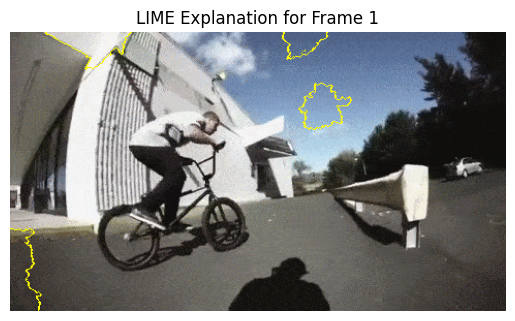

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption for Frame 2: a man riding a bike down a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

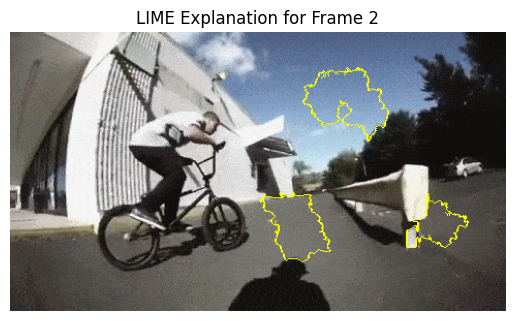

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption for Frame 3: a man riding a bike on a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

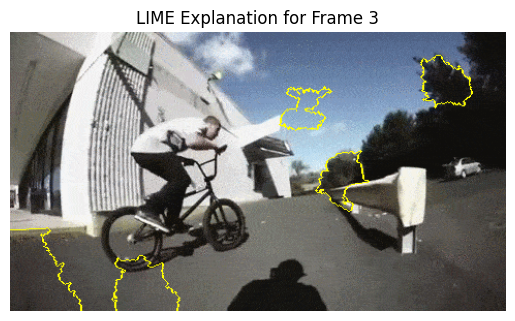

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption for Frame 4: a man riding a bike down a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

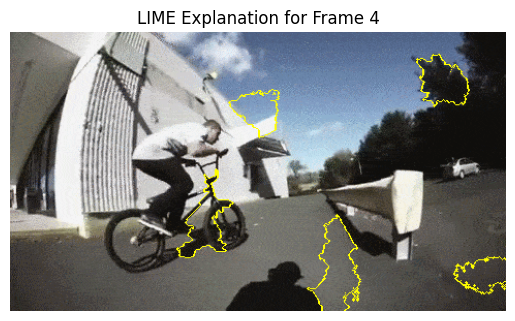

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption for Frame 5: a person riding a bike on a street


  0%|          | 0/5 [00:00<?, ?it/s]

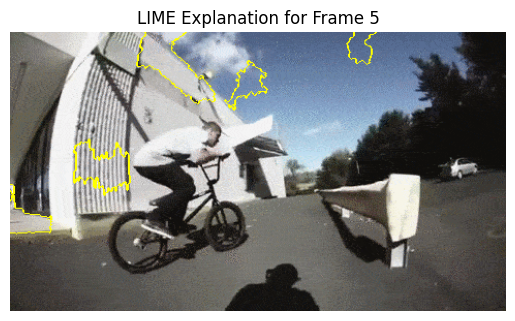

['a man riding a bike down a ramp',
 'a man riding a bike down a ramp',
 'a man riding a bike on a ramp',
 'a man riding a bike down a ramp',
 'a person riding a bike on a street']

In [ ]:
# List to store captions for each frame
captions = []

# Loop through each selected frame
for i, frame in enumerate(frames):
    # Generate caption for each frame
    inputs = blip_processor(images=frame, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        output = blip_model.generate(inputs["pixel_values"])
        caption = blip_processor.decode(output[0], skip_special_tokens=True)

    captions.append(caption)  # Store the caption
    print(f"Caption for Frame {i+1}: {caption}")  # Print the caption

    # Convert frame to NumPy array for LIME
    frame_array = np.array(frame)

    # Ensure the array is in RGB format if it is grayscale
    if frame_array.ndim == 2:
        frame_array = np.stack((frame_array,) * 3, axis=-1)

    # Apply LIME for interpretability on each frame
    explanation = explainer.explain_instance(
        frame_array,  # Pass the formatted frame
        blip_predict,
        top_labels=1,
        hide_color=0,
        num_samples=5  # Number of perturbed samples
    )

    # Visualize the explanation on the frame
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )
    # Display the LIME explanation
    plt.imshow(mark_boundaries(temp, mask))
    plt.axis("off")
    plt.title(f"LIME Explanation for Frame {i+1}")
    plt.show()

# The list of captions for the first 5 frames
captions

array([[[ 90,  88,  84],
        [ 98,  93,  87],
        [107, 105, 100],
        ...,
        [ 15,  14,  12],
        [ 15,  14,  12],
        [ 19,  17,  14]],

       [[ 94,  98,  88],
        [ 94,  98,  88],
        [ 94,  98,  88],
        ...,
        [ 19,  17,  14],
        [ 19,  17,  14],
        [ 15,  14,  12]],

       [[ 90,  88,  84],
        [ 98,  93,  87],
        [102, 100,  91],
        ...,
        [ 19,  17,  14],
        [ 19,  17,  14],
        [ 15,  14,  12]],

       ...,

       [[ 45,  49,  41],
        [ 45,  49,  41],
        [ 37,  35,  28],
        ...,
        [ 53,  49,  28],
        [ 45,  49,  41],
        [ 50,  40,  28]],

       [[ 45,  49,  41],
        [ 50,  40,  28],
        [ 41,  39,  37],
        ...,
        [ 50,  40,  28],
        [ 45,  49,  41],
        [ 50,  40,  28]],

       [[ 41,  39,  37],
        [ 41,  39,  37],
        [ 54,  51,  44],
        ...,
        [ 53,  49,  28],
        [ 45,  49,  41],
        [ 50,  40,  28]]], dtype=uint8)
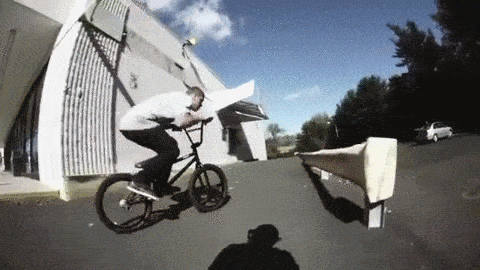

In [ ]:
temp

In [ ]:
import shap
# Define function for SHAP prediction
def blip_predict_shap(images):
    scores = []
    for img in images:
        img = Image.fromarray(img.astype('uint8'))
        inputs = blip_processor(images=img, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"])
            caption = blip_processor.decode(output[0], skip_special_tokens=True)
        scores.append(len(caption))  # Using caption length as a score for SHAP
    return np.array(scores)


In [ ]:
frames

[<PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>,
 <PIL.Image.Image image mode=RGB size=480x270>]

##SHAP values

In [ ]:
def blip_predict_shap(images, max_new_tokens=30):  # Adjust max_new_tokens as needed
    scores = []
    for img in images:
        img = Image.fromarray(img.astype('uint8'))
        inputs = blip_processor(images=img, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"], max_new_tokens=max_new_tokens)
            caption = blip_processor.decode(output[0], skip_special_tokens=True)
        scores.append(len(caption))  # Use caption length as a score for SHAP
    return np.array(scores)


In [ ]:

# Convert frames to NumPy arrays
frame_arrays = [np.array(frame.convert("RGB")) for frame in frames]


In [ ]:
import pandas as pd
# Create an empty DataFrame to store SHAP values
shap_values_df = pd.DataFrame()  # This line is added
shap_values_df = pd.DataFrame()

# Initialize a list to store all SHAP values
all_shap_values = []  # This line is added

In [ ]:

# Generate SHAP values for each frame and add to the dataframe
for i, frame_array in enumerate(frame_arrays):
    # Reshape frame_array to (1, height, width, 3)
    frame_array = frame_array[np.newaxis, ...]

    masker = shap.maskers.Image("blur(12,12)", frame_array.shape[1:])  # Changed to blur

    # Create SHAP explainer and calculate SHAP values
    explainer = shap.Explainer(blip_predict_shap, masker, max_evals=10)
    shap_values = explainer(frame_array)

#     # Store the SHAP values for each frame in the dataframe
    shap_values_df[f"Frame_{i+1}"] = shap_values.values.flatten()
    all_shap_values.append(shap_values)  # Store SHAP values for each frame





In [ ]:
# Display the SHAP values dataframe
print(shap_values_df)

         Frame_1   Frame_2  Frame_3   Frame_4  Frame_5
0      -0.000026  0.000013 -0.00001 -0.000008  0.00000
1      -0.000026  0.000013 -0.00001 -0.000008  0.00000
2      -0.000026  0.000013 -0.00001 -0.000008  0.00000
3      -0.000026  0.000013 -0.00001 -0.000008  0.00000
4      -0.000026  0.000013 -0.00001 -0.000008  0.00000
...          ...       ...      ...       ...      ...
388795  0.000031 -0.000005 -0.00001 -0.000018 -0.00001
388796  0.000031 -0.000005 -0.00001 -0.000018 -0.00001
388797  0.000031 -0.000005 -0.00001 -0.000018 -0.00001
388798  0.000031 -0.000005 -0.00001 -0.000018 -0.00001
388799  0.000031 -0.000005 -0.00001 -0.000018 -0.00001

[388800 rows x 5 columns]


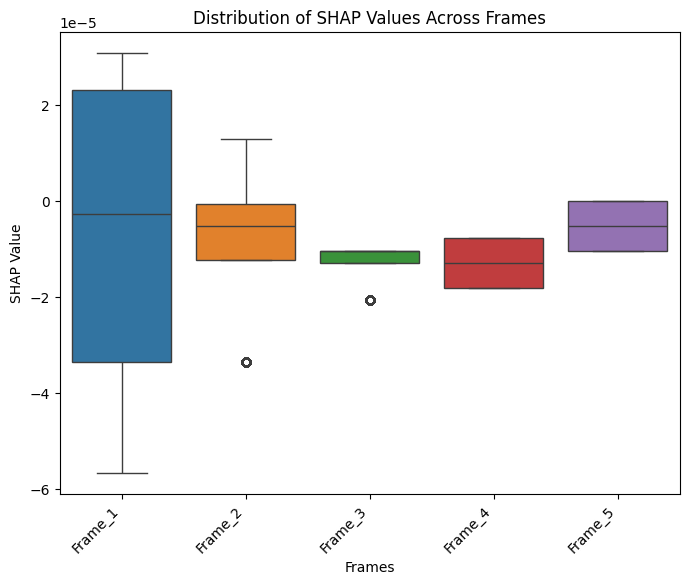

In [ ]:
# prompt: visualize shap_values_df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot of SHAP values across all frames
plt.figure(figsize=(8, 6))
sns.boxplot(data=shap_values_df)
plt.title("Distribution of SHAP Values Across Frames")
plt.xlabel("Frames")
plt.ylabel("SHAP Value")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()




# LIME BULK

Trained model BLIP loaded successfully.
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test1.gif
Caption for Frame 1: minions from des des des des des des des des des des des des des des des des des


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: minions from des des des des des des des des des des des des des des des des des


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: minions from des des des des des des des des des des des des des des des des des


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a bunch of minions sitting in a row


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a group of minions sitting in a row


  0%|          | 0/5 [00:00<?, ?it/s]

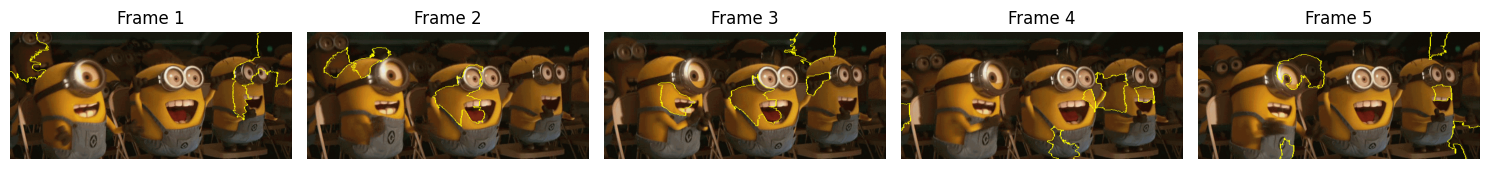

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test1.gif: ['minions from des des des des des des des des des des des des des des des des des', 'minions from des des des des des des des des des des des des des des des des des', 'minions from des des des des des des des des des des des des des des des des des', 'a bunch of minions sitting in a row', 'a group of minions sitting in a row']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test2.gif
Caption for Frame 1: two women sitting at a table


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: two women sitting at a table


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: two women sitting at a table with a bottle of wine


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: two women sitting at a table


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a woman sitting at a table with a glass of wine


  0%|          | 0/5 [00:00<?, ?it/s]

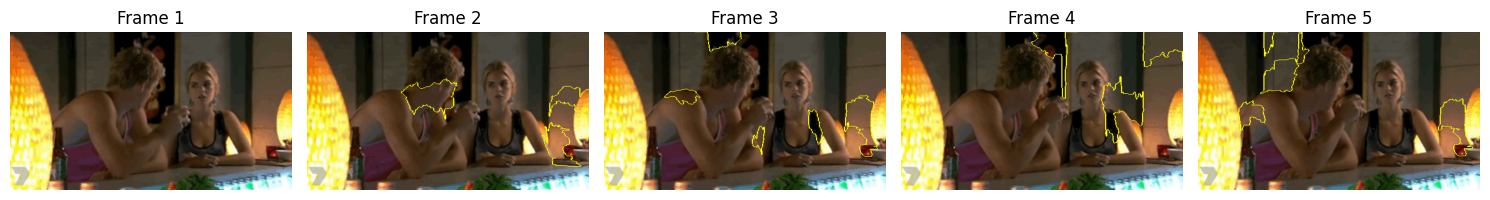

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test2.gif: ['two women sitting at a table', 'two women sitting at a table', 'two women sitting at a table with a bottle of wine', 'two women sitting at a table', 'a woman sitting at a table with a glass of wine']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test3.gif
Caption for Frame 1: a dog standing on its hinds on a rug


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a dog standing on a rug in a kitchen


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a dog standing on a rug in a kitchen


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a dog standing on a rug with a ball in its mouth


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a dog playing with a ball on the floor


  0%|          | 0/5 [00:00<?, ?it/s]

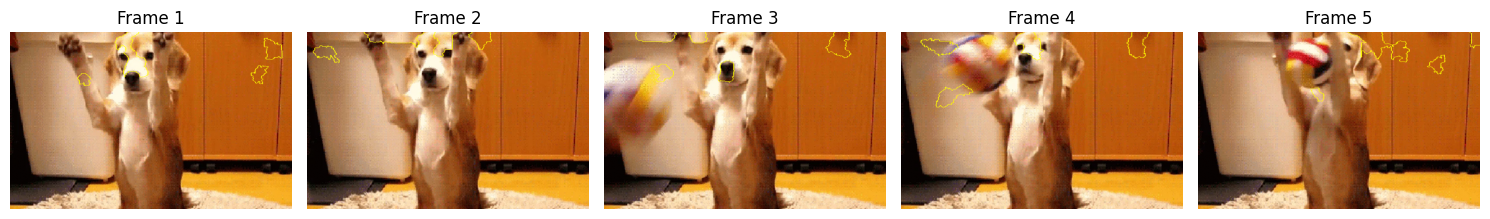

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test3.gif: ['a dog standing on its hinds on a rug', 'a dog standing on a rug in a kitchen', 'a dog standing on a rug in a kitchen', 'a dog standing on a rug with a ball in its mouth', 'a dog playing with a ball on the floor']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test4.gif
Caption for Frame 1: a cat is eating a green leaf on a plate


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a cat sitting on a table with a plate of food


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a cat sitting on a table eating a piece of lete


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a cat sitting on a table with a plate of food


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a cat is standing next to a plate of food


  0%|          | 0/5 [00:00<?, ?it/s]

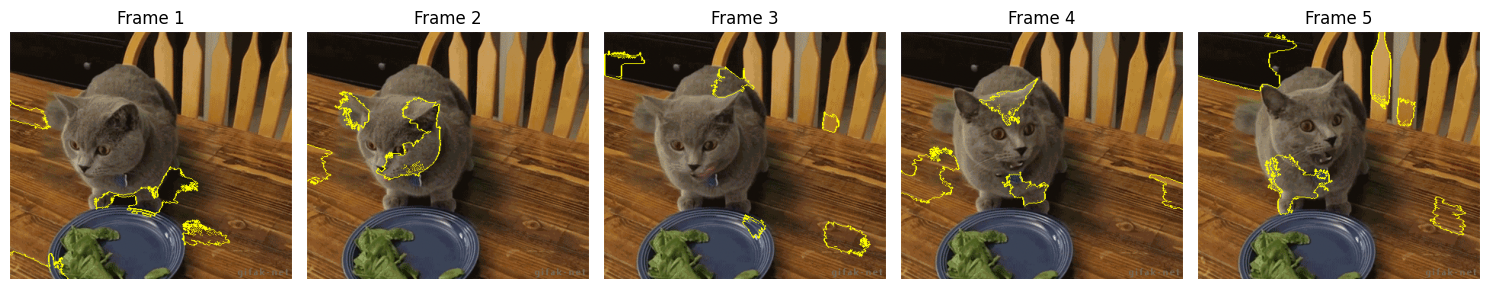

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test4.gif: ['a cat is eating a green leaf on a plate', 'a cat sitting on a table with a plate of food', 'a cat sitting on a table eating a piece of lete', 'a cat sitting on a table with a plate of food', 'a cat is standing next to a plate of food']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test5.gif
Caption for Frame 1: a man riding a bike down a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a man riding a bike down a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a man riding a bike on a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a man riding a bike down a ramp


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a person riding a bike on a street


  0%|          | 0/5 [00:00<?, ?it/s]

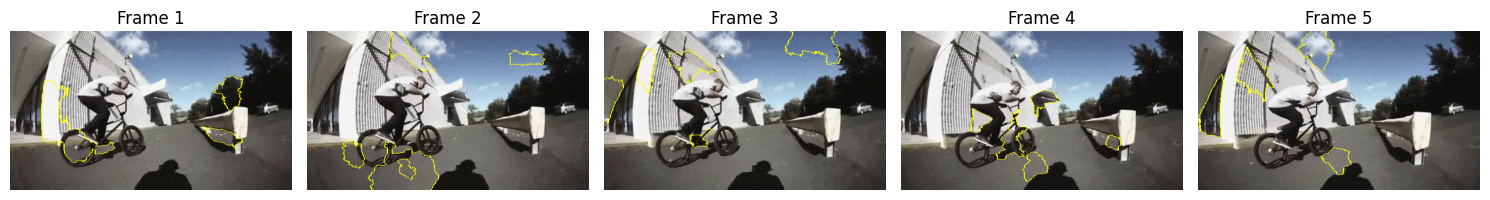

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test5.gif: ['a man riding a bike down a ramp', 'a man riding a bike down a ramp', 'a man riding a bike on a ramp', 'a man riding a bike down a ramp', 'a person riding a bike on a street']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test6.gif
Caption for Frame 1: a view of a mountain


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a view of a mountain from a car


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a view of a mountain


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a view of a mountain


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a cloudy sky


  0%|          | 0/5 [00:00<?, ?it/s]

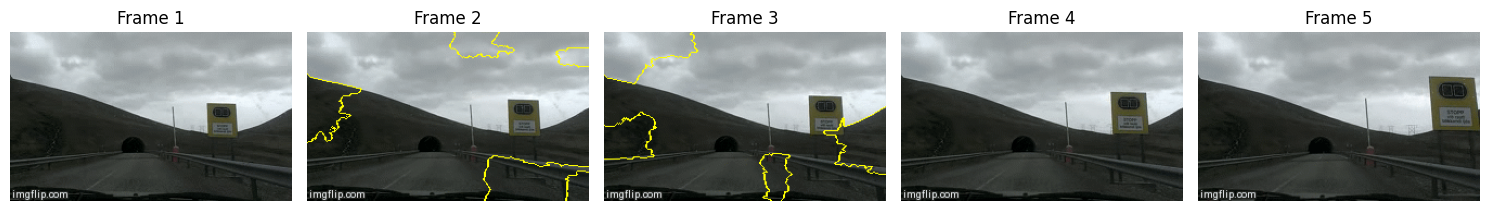

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test6.gif: ['a view of a mountain', 'a view of a mountain from a car', 'a view of a mountain', 'a view of a mountain', 'a cloudy sky']


In [30]:
v bimport numpy as np
import torch
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
from lime import lime_image
from transformers import BlipProcessor, BlipForConditionalGeneration
from skimage.segmentation import mark_boundaries
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# List of GIF file paths
gif_paths = [
    '/content/drive/My Drive/Milestone3_4/Test gifs/test1.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test2.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test3.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test4.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test5.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test6.gif'
]

# Initialize the BLIP processor and model
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to('cuda' if torch.cuda.is_available() else 'cpu')

# Load model weights
blip_model_path = '/content/drive/My Drive/Milestone3_4/Models/blip_model.pth'
blip_model.load_state_dict(torch.load(blip_model_path))
blip_model.eval()  # Set the model to evaluation mode

print("Trained model BLIP loaded successfully.")

# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Define the prediction function for LIME
def blip_predict(images):
    scores = []
    for img in images:
        # Ensure img is a NumPy array and has the correct shape
        if isinstance(img, np.ndarray):
            if img.ndim == 2:  # Convert grayscale to RGB
                img = np.stack((img,) * 3, axis=-1)
            img = Image.fromarray(img.astype('uint8'))  # Convert array back to a PIL Image if necessary

        # Process the image
        inputs = blip_processor(images=img, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')

        # Generate caption using BLIP
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"])
            caption = blip_processor.decode(output[0], skip_special_tokens=True)

        # Use the length of the caption as a proxy score for interpretability
        scores.append([len(caption)])
    return np.array(scores)

# Process each GIF in the list
for gif_path in gif_paths:
    print(f"Processing GIF: {gif_path}")

    # Load the GIF file
    gif = Image.open(gif_path)

    # Extract the first 5 frames from the GIF and convert them to RGB
    frames = [frame.convert("RGB") for i, frame in enumerate(ImageSequence.Iterator(gif)) if i < 5]

    # List to store captions for each frame
    captions = []

    # Prepare to visualize LIME outputs
    plt.figure(figsize=(15, 5))

    # Loop through each selected frame
    for i, frame in enumerate(frames):
        # Generate caption for each frame
        inputs = blip_processor(images=frame, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"])
            caption = blip_processor.decode(output[0], skip_special_tokens=True)

        captions.append(caption)  # Store the caption
        print(f"Caption for Frame {i + 1}: {caption}")  # Print the caption

        # Convert frame to NumPy array for LIME
        frame_array = np.array(frame)

        # Ensure the array is in RGB format if it is grayscale
        if frame_array.ndim == 2:
            frame_array = np.stack((frame_array,) * 3, axis=-1)

        # Apply LIME for interpretability on each frame
        explanation = explainer.explain_instance(
            frame_array,  # Pass the formatted frame
            blip_predict,
            top_labels=1,
            hide_color=0,
            num_samples=5  # Number of perturbed samples
        )

        # Visualize the explanation on the frame
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=True,
            num_features=5,
            hide_rest=False
        )

        # Store the LIME visualization
        lime_image = mark_boundaries(temp, mask)

        # Display LIME visualization for each frame
        plt.subplot(1, 5, i + 1)  # Show all frames side by side
        plt.imshow(lime_image)
        plt.axis("off")
        plt.title(f"Frame {i + 1}")

    # Show selected frames and their captions
    plt.tight_layout()
    plt.show()

    # The list of captions for the current GIF
    print(f"Captions for GIF {gif_path}: {captions}")

Trained model BLIP loaded successfully.
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test7.gif
Caption for Frame 1: two men in a car


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: two men in a car


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: two men in a car


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: two men in a car


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: two men in a car


  0%|          | 0/5 [00:00<?, ?it/s]

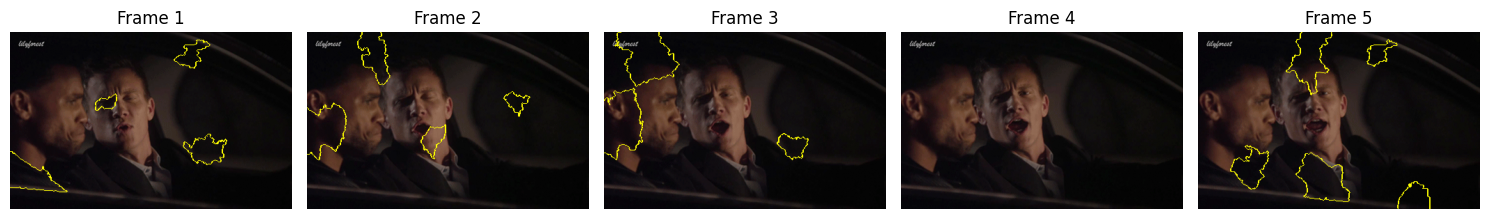

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test7.gif: ['two men in a car', 'two men in a car', 'two men in a car', 'two men in a car', 'two men in a car']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test8.gif
Caption for Frame 1: a man sitting on a chair


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a man in a suit and tie is standing in a room


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a man in a suit and tie is standing in front of a camera


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a man in a suit and tie is standing in a room


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a man in a suit and helmet is playing a video game


  0%|          | 0/5 [00:00<?, ?it/s]

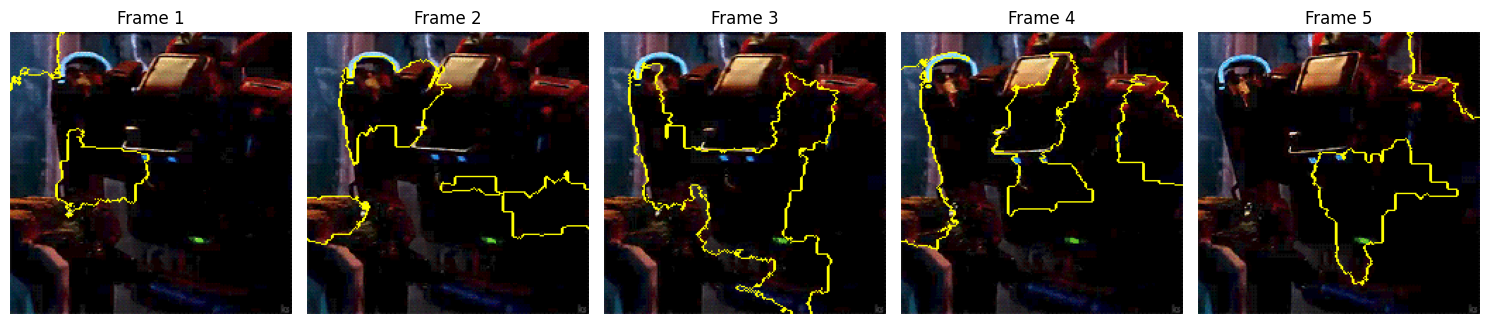

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test8.gif: ['a man sitting on a chair', 'a man in a suit and tie is standing in a room', 'a man in a suit and tie is standing in front of a camera', 'a man in a suit and tie is standing in a room', 'a man in a suit and helmet is playing a video game']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test9.gif
Caption for Frame 1: a group of people are playing a game


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a group of people playing a game in a room


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a group of people are playing a game


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a group of people are dancing in a room


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a group of people are playing a game


  0%|          | 0/5 [00:00<?, ?it/s]

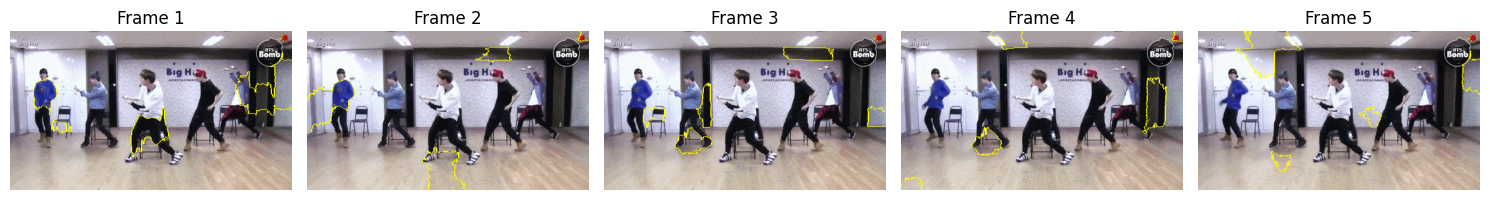

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test9.gif: ['a group of people are playing a game', 'a group of people playing a game in a room', 'a group of people are playing a game', 'a group of people are dancing in a room', 'a group of people are playing a game']
Processing GIF: /content/drive/My Drive/Milestone3_4/Test gifs/test10.gif
Caption for Frame 1: a small rabbit sitting on a bed


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 2: a rabbit sitting on a bed


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 3: a small rabbit sitting on a bed


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 4: a baby rabbit sitting on a bed


  0%|          | 0/5 [00:00<?, ?it/s]

Caption for Frame 5: a small rabbit sitting on the floor


  0%|          | 0/5 [00:00<?, ?it/s]

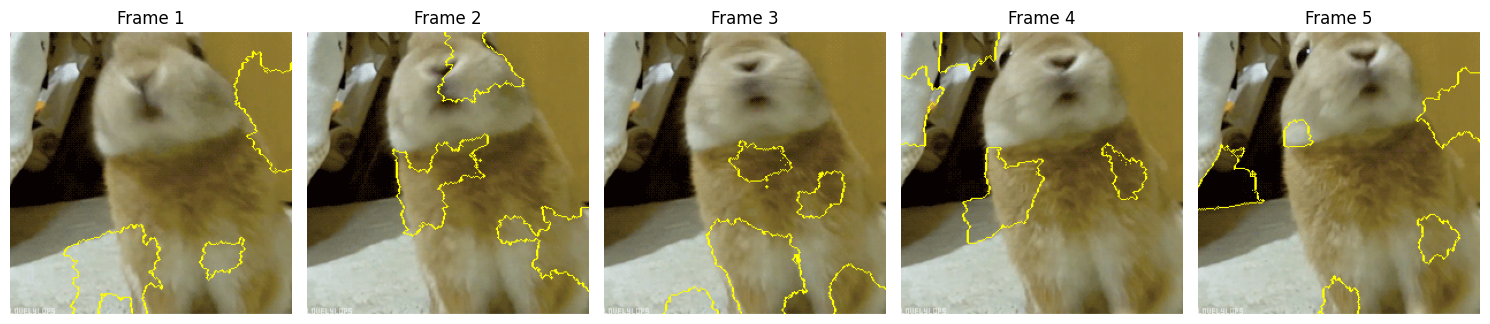

Captions for GIF /content/drive/My Drive/Milestone3_4/Test gifs/test10.gif: ['a small rabbit sitting on a bed', 'a rabbit sitting on a bed', 'a small rabbit sitting on a bed', 'a baby rabbit sitting on a bed', 'a small rabbit sitting on the floor']


In [31]:
import numpy as np
import torch
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
from lime import lime_image
from transformers import BlipProcessor, BlipForConditionalGeneration
from skimage.segmentation import mark_boundaries
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# List of GIF file paths
gif_paths = [
    '/content/drive/My Drive/Milestone3_4/Test gifs/test7.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test8.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test9.gif',
    '/content/drive/My Drive/Milestone3_4/Test gifs/test10.gif'
]

# Initialize the BLIP processor and model
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to('cuda' if torch.cuda.is_available() else 'cpu')

# Load model weights
blip_model_path = '/content/drive/My Drive/Milestone3_4/Models/blip_model.pth'
blip_model.load_state_dict(torch.load(blip_model_path))
blip_model.eval()  # Set the model to evaluation mode

print("Trained model BLIP loaded successfully.")

# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Define the prediction function for LIME
def blip_predict(images):
    scores = []
    for img in images:
        # Ensure img is a NumPy array and has the correct shape
        if isinstance(img, np.ndarray):
            if img.ndim == 2:  # Convert grayscale to RGB
                img = np.stack((img,) * 3, axis=-1)
            img = Image.fromarray(img.astype('uint8'))  # Convert array back to a PIL Image if necessary

        # Process the image
        inputs = blip_processor(images=img, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')

        # Generate caption using BLIP
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"])
            caption = blip_processor.decode(output[0], skip_special_tokens=True)

        # Use the length of the caption as a proxy score for interpretability
        scores.append([len(caption)])
    return np.array(scores)

# Process each GIF in the list
for gif_path in gif_paths:
    print(f"Processing GIF: {gif_path}")

    # Load the GIF file
    gif = Image.open(gif_path)

    # Extract the first 5 frames from the GIF and convert them to RGB
    frames = [frame.convert("RGB") for i, frame in enumerate(ImageSequence.Iterator(gif)) if i < 5]

    # List to store captions for each frame
    captions = []

    # Prepare to visualize LIME outputs
    plt.figure(figsize=(15, 5))

    # Loop through each selected frame
    for i, frame in enumerate(frames):
        # Generate caption for each frame
        inputs = blip_processor(images=frame, return_tensors="pt").to('cuda' if torch.cuda.is_available() else 'cpu')
        with torch.no_grad():
            output = blip_model.generate(inputs["pixel_values"])
            caption = blip_processor.decode(output[0], skip_special_tokens=True)

        captions.append(caption)  # Store the caption
        print(f"Caption for Frame {i + 1}: {caption}")  # Print the caption

        # Convert frame to NumPy array for LIME
        frame_array = np.array(frame)

        # Ensure the array is in RGB format if it is grayscale
        if frame_array.ndim == 2:
            frame_array = np.stack((frame_array,) * 3, axis=-1)

        # Apply LIME for interpretability on each frame
        explanation = explainer.explain_instance(
            frame_array,  # Pass the formatted frame
            blip_predict,
            top_labels=1,
            hide_color=0,
            num_samples=5  # Number of perturbed samples
        )

        # Visualize the explanation on the frame
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=True,
            num_features=5,
            hide_rest=False
        )

        # Store the LIME visualization
        lime_image = mark_boundaries(temp, mask)

        # Display LIME visualization for each frame
        plt.subplot(1, 5, i + 1)  # Show all frames side by side
        plt.imshow(lime_image)
        plt.axis("off")
        plt.title(f"Frame {i + 1}")

    # Show selected frames and their captions
    plt.tight_layout()
    plt.show()

    # The list of captions for the current GIF
    print(f"Captions for GIF {gif_path}: {captions}")